# Load sanitized layoffs dataset

In [3]:
# Import required libraries and dependencies

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import hvplot.pandas
import geopandas as gpd

In [4]:
# Read sanitized saved data
layoffs_sanitized_dataset = pd.read_csv("Output_Data/Layoffs_Sanitized.csv")

# Convert values of 'date' column to datetime format to extract year from the date for further data analysis
layoffs_sanitized_dataset['date'] = pd.to_datetime(layoffs_sanitized_dataset['date'])

layoffs_sanitized_dataset.head(10)

,company,location,industry,total_laid_off,date,stage,country,Lat,Lon
0,Airtable,SF Bay Area,Product,237,2023-09-14,Series F,United States,37.788497,-122.355847
1,R3,New York City,Crypto,1,2023-09-14,Series A,United States,40.737233,-73.862477
2,Akili Labs,Boston,Healthcare,1,2023-09-13,Post-IPO,United States,42.350804,-71.053673
3,Google,SF Bay Area,Consumer,1,2023-09-13,Post-IPO,United States,37.788497,-122.355847
4,Evolve,Denver,Travel,175,2023-09-12,Series F,United States,39.748625,-104.988623
5,Binance.US,SF Bay Area,Crypto,100,2023-09-12,Subsidiary,United States,37.788497,-122.355847
6,Paper,Montreal,Education,87,2023-09-12,Series D,Canada,8.979024,-83.528159
7,Homeday,Berlin,Real Estate,40,2023-09-12,Unknown,Germany,52.503664,13.424156
8,At-Bay,SF Bay Area,Security,27,2023-09-12,Unknown,United States,37.788497,-122.355847
9,Eurora,Tallinn,Other,111,2023-09-11,Series A,Estonia,59.433520,24.752140


# Data Analysis

### Top 10 Countries affected by layoffs since Covid-19

In [5]:
# Create a series of data group by country details having values for the total number of layoffs
Layoff_by_Countries = layoffs_sanitized_dataset.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(10)

# Create lists of the key values for plotting 
countries_list = Layoff_by_Countries.keys()
layoff_count_list = Layoff_by_Countries.values

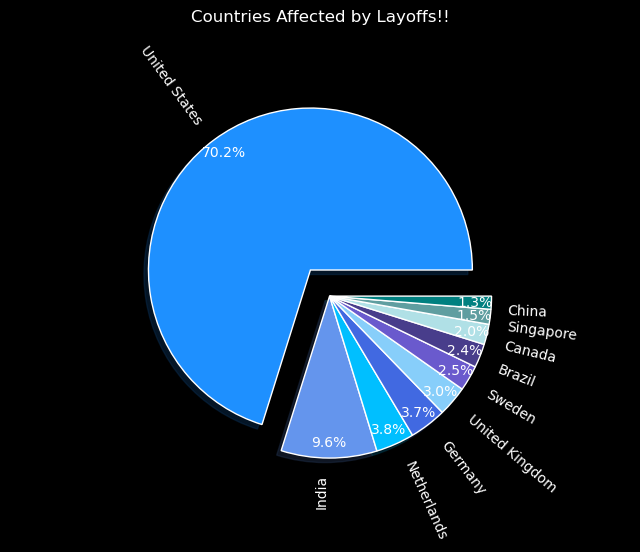

In [6]:
# Pie chart to show the percentage of layoffs for top 10 countries

# Pie Plot
fig = plt.figure(figsize = (8, 5))

# create a figure and set different background
fig.patch.set_facecolor('black')

# Change color of text
plt.rcParams['text.color'] = 'white'

# Creating the Pie Plot
myexplode = [0.2, 0, 0, 0, 0,0, 0, 0, 0 ,0]
mycolors = ['DodgerBlue','CornflowerBlue','DeepSkyBlue','RoyalBlue','LightSkyBlue', 'slateblue','darkslateblue','powderblue','cadetblue','teal']
plt.pie(layoff_count_list, labels=countries_list,autopct="%1.1f%%",
        colors = mycolors, explode = myexplode, shadow = True, wedgeprops = {"linewidth": 1, "edgecolor": "white"},
         labeldistance=1.1, pctdistance=0.9, rotatelabels=True)

plt.axis('equal')

plt.title("Countries Affected by Layoffs!!", pad =50)

# Save the graph in Images folder
plt.savefig("Output_Data/Images/Percentage_Countries_Pie.png")

plt.show()

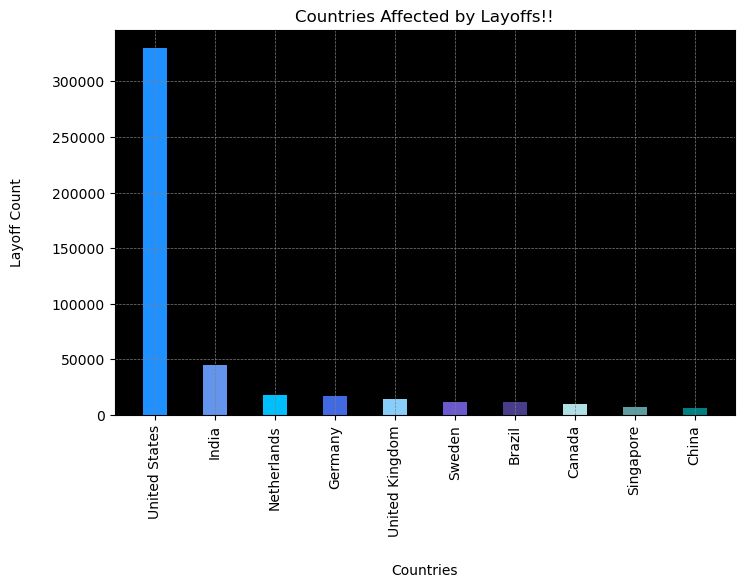

In [27]:
# Bar chart to show the top 10 countries affected by layoffs and total number of layoffs

# Bar Plot
fig, ax = plt.subplots(figsize = (8, 5))

# Creating the bar plot
mycolors = ['DodgerBlue','CornflowerBlue','DeepSkyBlue','RoyalBlue','LightSkyBlue', 'slateblue','darkslateblue','powderblue','cadetblue','teal']
ax.bar(countries_list, layoff_count_list, color =mycolors, 
        width = 0.4)

# Labeling the graph
plt.xlabel("Countries", labelpad=20)
plt.xticks(rotation = 90)
plt.ylabel("Layoff Count", labelpad=20)
ax.set_title("Countries Affected by Layoffs!!", color='Black')
ax.set_facecolor('black')

# Inserting a grid
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# Save the graph in Images folder
plt.savefig("Output_Data/Images/TotalLayoffs_Countries_Bar.png")
plt.show()

#### Analysis
- The top 10 results from the dataset show that United States is most affected by layoffs (70.2%) compared to the other countries.
- China is the least affected with only 1.3%.

###  Top 10 Industries affected by layoffs throughout the world since Covid-19

In [29]:
# Create a series of data group by industry details having values for the total number of layoffs

Layoff_by_Industries = layoffs_sanitized_dataset.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)

# Create lists of the key values for plotting 
industries_list = Layoff_by_Industries.keys()
layoff_count_list = Layoff_by_Industries.values

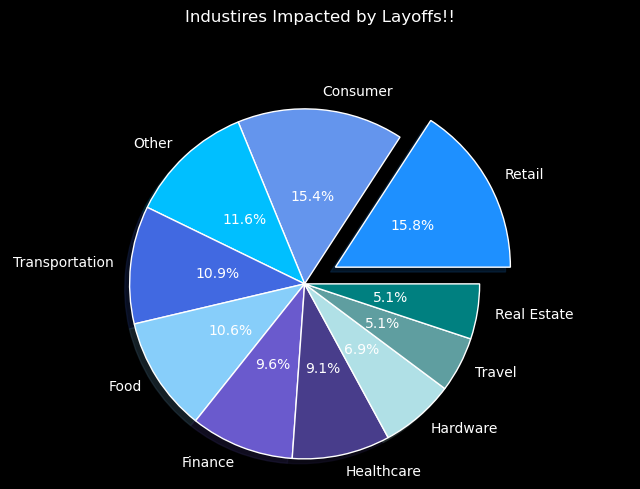

In [7]:
# Pie chart to show the percentage of different industries affected by layoffs

# Pie Plot
fig = plt.figure(figsize = (8, 5))

# create a figure and set different background
fig.patch.set_facecolor('black')

# Change color of text
plt.rcParams['text.color'] = 'white'
 
# Creating the pie plot
myexplode = [0.2, 0, 0, 0, 0,0, 0, 0, 0 ,0]
mycolors = ['DodgerBlue','CornflowerBlue','DeepSkyBlue','RoyalBlue','LightSkyBlue', 'slateblue','darkslateblue','powderblue','cadetblue','teal']
plt.pie(layoff_count_list, labels=industries_list,autopct="%1.1f%%", colors = mycolors, 
        explode = myexplode, shadow = True, wedgeprops = {"linewidth": 1, "edgecolor": "white"},
        labeldistance=1.1, pctdistance=0.5)

plt.axis('equal')
 
plt.title("Industires Impacted by Layoffs!!", pad =50)

# Save the graph in Images folder
plt.savefig("Output_Data/Images/Percentage_Industries_Pie.png")

plt.show()

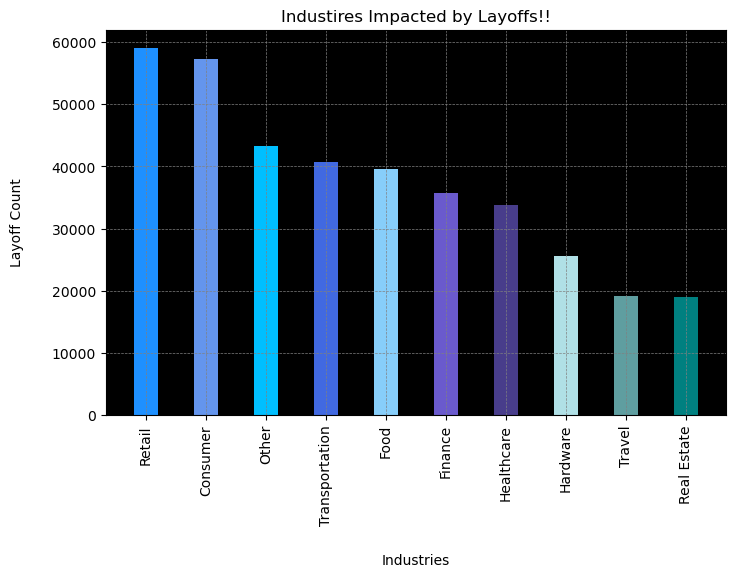

In [30]:
# Bar chart to show the different industries affected by layoffs and total number of layoffs

# Bar Plot
fig, ax = plt.subplots(figsize = (8, 5))

# Creating the bar plot
mycolors = ['DodgerBlue','CornflowerBlue','DeepSkyBlue','RoyalBlue','LightSkyBlue', 'slateblue','darkslateblue','powderblue','cadetblue','teal']
ax.bar(industries_list, layoff_count_list, color =mycolors, 
        width = 0.4)

# Labeling the graph
plt.xlabel("Industries", labelpad=20 )
plt.xticks(rotation = 90)
plt.ylabel("Layoff Count", labelpad=20 )
ax.set_title("Industires Impacted by Layoffs!!", color='Black')
ax.set_facecolor('black')

# Inserting a grid
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# Save the graph in Images folder
plt.savefig("Output_Data/Images/TotalLayoffs_Industries_Bar.png")
plt.show()

### Analysis
- Analysis of the top 10 rows of the dataset indicates that retail segment is most affected by layoffs. The layoff percentage in retail is 15.8%.
- Consumer segment is very close at 15.4%.
- Real Estate is the least impacted of all the other industries at 5.1%.

### Top 10 Funding Stage at which the impacted company is and the total layoffs counts

In [32]:
# Create a series of data group by industry details having values for the total number of layoffs
Layoff_by_Stage = layoffs_sanitized_dataset.groupby('stage')['total_laid_off'].sum().sort_values(ascending=False).head(10)

# Create lists of the key values for plotting 
stage_list = Layoff_by_Stage.keys()
layoff_count_list = Layoff_by_Stage.values

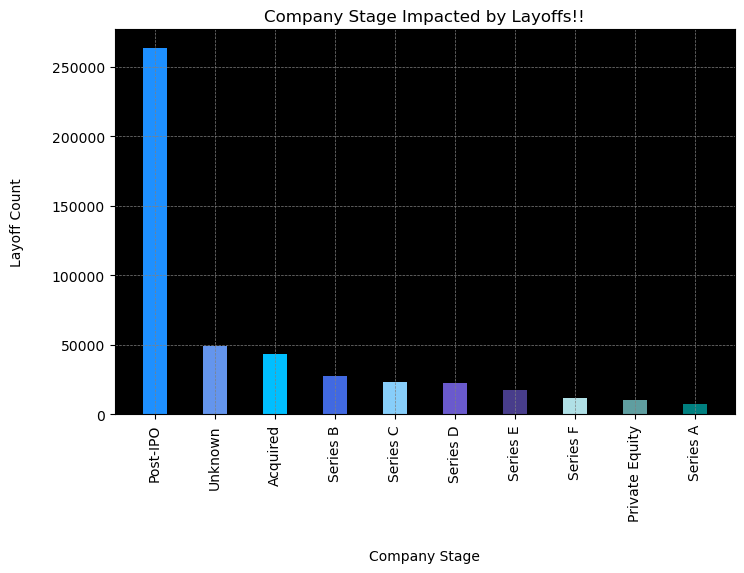

In [35]:
# Bar chart to show the different company stages affected by layoffs and total number of layoffs

# Bar Plot
fig, ax = plt.subplots(figsize = (8, 5))

# Creating the bar plot
mycolors = ['DodgerBlue','CornflowerBlue','DeepSkyBlue','RoyalBlue','LightSkyBlue', 'slateblue','darkslateblue','powderblue','cadetblue','teal']
ax.bar(stage_list, layoff_count_list, color =mycolors, 
        width = 0.4)

# Labeling the graph
plt.xlabel("Company Stage", labelpad=20 )
plt.xticks(rotation = 90)
plt.ylabel("Layoff Count", labelpad=20 )
ax.set_title("Company Stage Impacted by Layoffs!!", color='Black')
ax.set_facecolor('black')


# Inserting a grid
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# Save the graph in Images folder
plt.savefig("Output_Data/Images/TotalLayoffs_Stage_Bar.png")
plt.show()

### Analysis
- Public listed companies are most affected by layoffs.
- Other stages before IPO have very minimal impact from layoffs.

### Time series analysis of layoffs since Covid-19

In [37]:
# Create a series of data group by year details having values for the total number of layoffs
layoffs_sanitized_df = layoffs_sanitized_dataset.copy()
layoffs_sanitized_df['date'] = layoffs_sanitized_df['date'].dt.year
layoffs_sanitized_df['date']= layoffs_sanitized_df['date'].values.astype(str)

Layoff_by_Years = layoffs_sanitized_df.groupby('date')['total_laid_off'].sum()


# Create lists of the key values for plotting 
Years = Layoff_by_Years.keys()
layoff_count_list = Layoff_by_Years.values

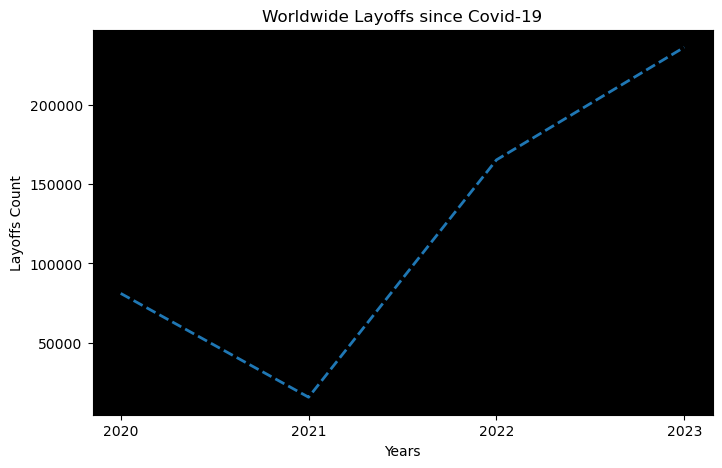

In [38]:
# Line Graph

fig, ax = plt.subplots(figsize = (8, 5))

plt.plot(Years, layoff_count_list, linewidth=2, linestyle="--")

plt.xlabel("Years")
plt.ylabel("Layoffs Count")
ax.set_title('Worldwide Layoffs since Covid-19', color ='Black')
ax.set_facecolor('black')

# Save the graph in Images folder
plt.savefig("Output_Data/Images/WorldwideTimeSeries_Layoffs.png")

In [39]:
# Extracting year from date column and converting it to string
layoffs_sanitized_df = layoffs_sanitized_dataset.copy()
layoffs_sanitized_df['date'] = layoffs_sanitized_df['date'].dt.year
layoffs_sanitized_df['date']= layoffs_sanitized_df['date'].values.astype(str)

# Filter the data for USA and non USA cities for plotting 
USA_YearlyLayoffs = layoffs_sanitized_df[layoffs_sanitized_df['country'] == 'United States'].groupby('date')['total_laid_off'].sum()
ROW_YearlyLayoffs = layoffs_sanitized_df[layoffs_sanitized_df['country'] != 'United States'].groupby('date')['total_laid_off'].sum()

# Create lists of the key values for plotting 
Years = USA_YearlyLayoffs.keys()
USAlayoff_count_list = USA_YearlyLayoffs.values
ROWlayoff_count_list = ROW_YearlyLayoffs.values

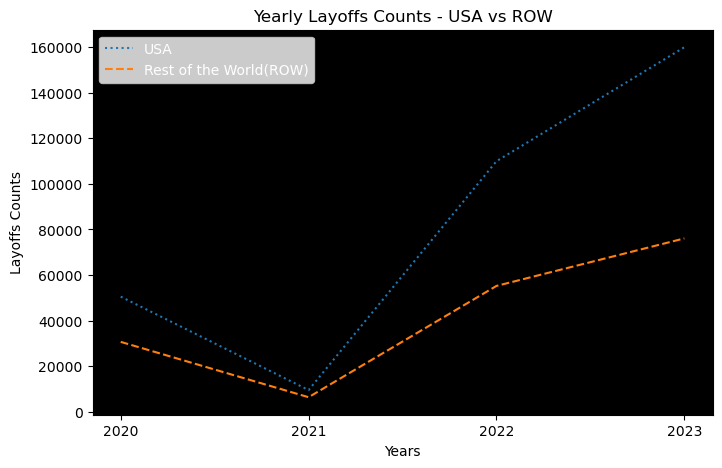

In [40]:
# Ploting two line graphs to show trend in layoff counts for USA and rest of the world

fig, ax = plt.subplots(figsize = (8, 5))

plt.plot(Years,USAlayoff_count_list , label = "USA", linestyle=":") 
plt.plot(Years,ROWlayoff_count_list, label = "Rest of the World(ROW)", linestyle="--") 

plt.xlabel("Years")
plt.ylabel("Layoffs Counts")
ax.set_title('Yearly Layoffs Counts - USA vs ROW', color ='black')
plt.legend()
ax.set_facecolor('black')

# Save the graph in Images folder
plt.savefig("Output_Data/Images/USA_vs_ROW_Layoffs.png")

### Analysis
- Based on the yearly layoff counts over the last 4 years across the world (USA and Rest of the world) we can say that the layoffs increased at the start of pandemic but gradually stabilized as the industries got used to the new way of functioning.
- However, we can evidently see that as the pandemic ended we see an evident increase in the layoffs count across the globe. This can be attributed to overhiring during the time of pandemic in certain business segments to meet the growing demands of customers.

### Top 5 Cities in USA vs rest of the world affected by Layoffs

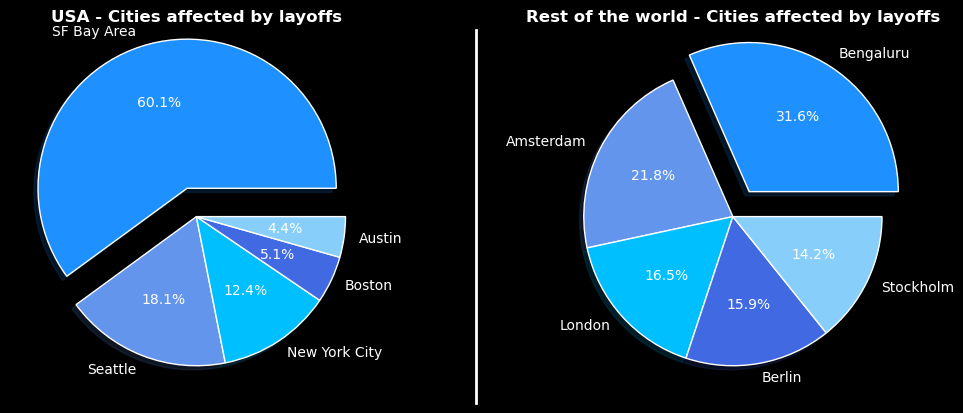

In [15]:
# Filter the data for USA and non USA cities for plotting 
Layoff_by_USCities = layoffs_sanitized_dataset[layoffs_sanitized_dataset['country'] == 'United States'].groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head()
Layoff_by_ROWCities = layoffs_sanitized_dataset[layoffs_sanitized_dataset['country'] != 'United States'].groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(rect=(0,0,1.7,0.9))

# create a figure and set different background
fig.patch.set_facecolor('black')

# Change color of text
plt.rcParams['text.color'] = 'white'

# set titles for each subplot
ax1.set_title("USA - Cities affected by layoffs", fontweight='bold')
ax2.set_title("Rest of the world - Cities affected by layoffs", fontweight='bold')

myexplode = [0.2, 0, 0, 0, 0]
mycolors = ['DodgerBlue','CornflowerBlue','DeepSkyBlue','RoyalBlue','LightSkyBlue']

# plot a pie chart for each data series
ax1.pie(x=Layoff_by_USCities,labels=Layoff_by_USCities.index, autopct = "%1.1f%%",
        colors = mycolors, explode = myexplode, shadow = True, wedgeprops = {"linewidth": 1, "edgecolor": "white"})
ax2.pie(x=Layoff_by_ROWCities,labels=Layoff_by_ROWCities.index, autopct = "%1.1f%%",
        colors = mycolors, explode = myexplode, shadow = True, wedgeprops = {"linewidth": 1, "edgecolor": "white"})

# insert line between subplots
ax1.plot([1.25, 1.25], [0, 1], color='white', lw=2, transform=ax1.transAxes, clip_on=False)

# Save the graph in Images folder
plt.savefig("Output_Data/Images/Layoff cities in USA and ROW.png", bbox_inches = 'tight')


### Top 5 Industries in USA vs rest of the world affected by Layoffs

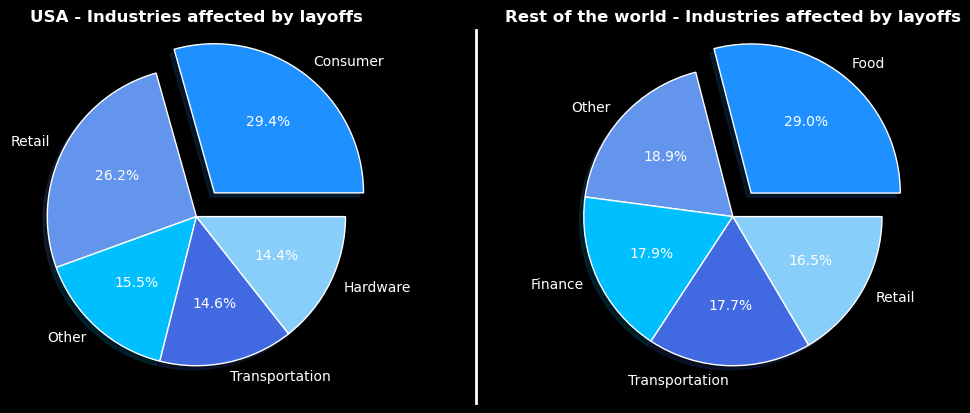

In [16]:
# Filter the data for USA and non USA industries for plotting 
Layoff_by_USindustries = layoffs_sanitized_dataset[layoffs_sanitized_dataset['country'] == 'United States'].groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head()
Layoff_by_ROWindustries = layoffs_sanitized_dataset[layoffs_sanitized_dataset['country'] != 'United States'].groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(rect=(0,0,1.7,0.9))

# create a figure and set different background
fig.patch.set_facecolor('black')

# Change color of text
plt.rcParams['text.color'] = 'white'

# set titles for each subplot
ax1.set_title("USA - Industries affected by layoffs", fontweight='bold')
ax2.set_title("Rest of the world - Industries affected by layoffs", fontweight='bold')

myexplode = [0.2, 0, 0, 0, 0]
mycolors = ['DodgerBlue','CornflowerBlue','DeepSkyBlue','RoyalBlue','LightSkyBlue']

# plot a pie chart for each data series
ax1.pie(x=Layoff_by_USindustries,labels=Layoff_by_USindustries.index, autopct = "%1.1f%%",
        colors = mycolors, explode = myexplode, shadow = True, wedgeprops = {"linewidth": 1, "edgecolor": "white"})
ax2.pie(x=Layoff_by_ROWindustries,labels=Layoff_by_ROWindustries.index, autopct = "%1.1f%%",
        colors = mycolors, explode = myexplode, shadow = True, wedgeprops = {"linewidth": 1, "edgecolor": "white"})

# insert line between subplots
ax1.plot([1.25, 1.25], [0, 1], color='white', lw=2, transform=ax1.transAxes, clip_on=False)

# Save the graph in Images folder
plt.savefig("Output_Data/Images/Affected Industries in USA and ROW.png",bbox_inches = 'tight')

### Top 5 Companies in USA vs rest of the world affected by Layoffs

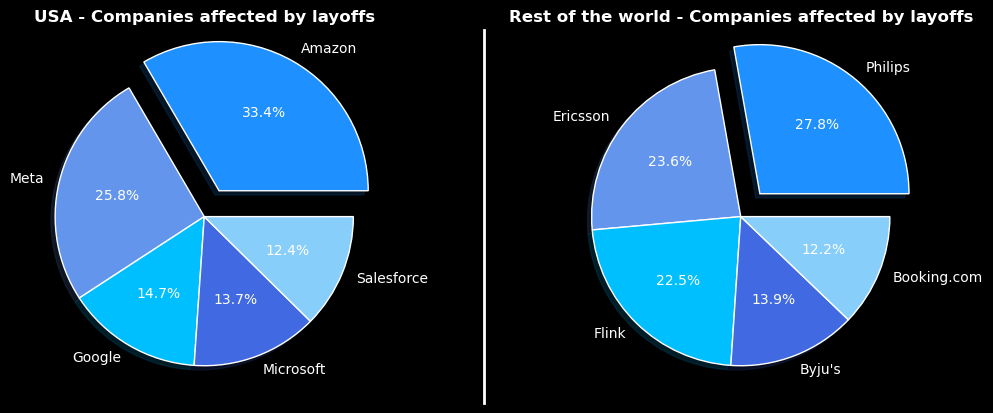

In [17]:
# Filter the data for USA and non USA companies for plotting 
Layoff_by_UScompanies = layoffs_sanitized_dataset[layoffs_sanitized_dataset['country'] == 'United States'].groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head()
Layoff_by_ROWcompanies = layoffs_sanitized_dataset[layoffs_sanitized_dataset['country'] != 'United States'].groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(rect=(0,0,1.7,0.9))

# create a figure and set different background
fig.patch.set_facecolor('black')

# Change color of text
plt.rcParams['text.color'] = 'white'

# set titles for each subplot
ax1.set_title("USA - Companies affected by layoffs", fontweight='bold')
ax2.set_title("Rest of the world - Companies affected by layoffs", fontweight='bold')

myexplode = [0.2, 0, 0, 0, 0]
mycolors = ['DodgerBlue','CornflowerBlue','DeepSkyBlue','RoyalBlue','LightSkyBlue']

# plot a pie chart for each data series
ax1.pie(x=Layoff_by_UScompanies,labels=Layoff_by_UScompanies.index, autopct = "%1.1f%%",
        colors = mycolors, explode = myexplode, shadow = True, wedgeprops = {"linewidth": 1, "edgecolor": "white"})
ax2.pie(x=Layoff_by_ROWcompanies,labels=Layoff_by_ROWcompanies.index, autopct = "%1.1f%%",
        colors = mycolors, explode = myexplode, shadow = True, wedgeprops = {"linewidth": 1, "edgecolor": "white"})

# insert line between subplots
ax1.plot([1.25, 1.25], [0, 1], color='white', lw=2, transform=ax1.transAxes, clip_on=False)

# Save the graph in Images folder
plt.savefig("Output_Data/Images/Companies affected in USA and ROW.png", bbox_inches = 'tight')

### Layoff in USA for every year since Covid-19, by industry & companies

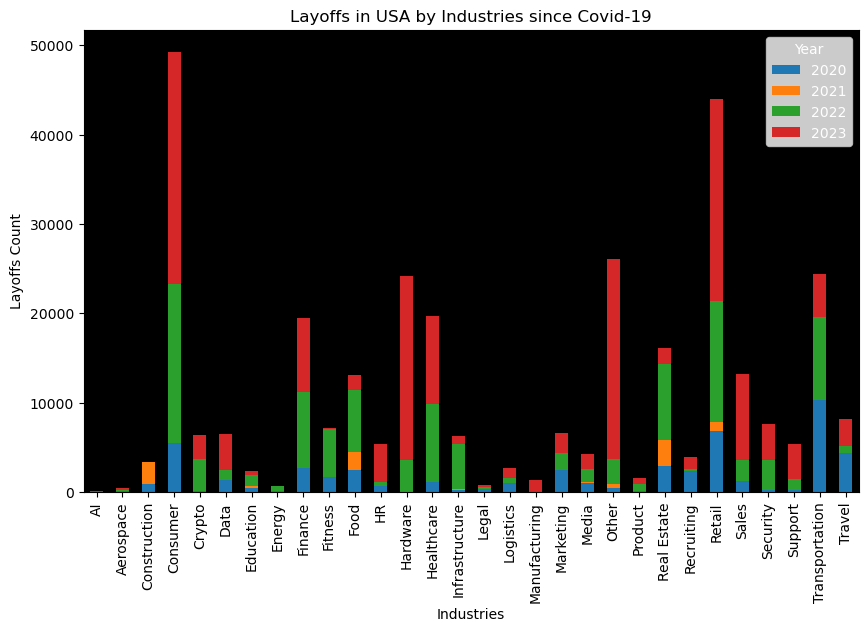

In [56]:
# Data filter for plotting the Stacked bar chart across different industries in USA for the years post Covid-19
USA_df = layoffs_sanitized_dataset[layoffs_sanitized_dataset['country'] == 'United States'].filter(['industry','date','total_laid_off'], axis=1)
USA_df['date'] = USA_df['date'].dt.year

dfp = USA_df.pivot_table(index='industry', columns='date', values='total_laid_off', aggfunc='sum')
# plot the pivoted dataframe
ax = dfp.plot.bar(stacked=True, figsize=(10, 6), ylabel='Layoffs Count', xlabel='Industries')

ax.set_title('Layoffs in USA by Industries since Covid-19', color ='Black')
ax.set_facecolor("black")
plt.legend(title='Year')

# Save the graph in Images folder
plt.savefig("Output_Data/Images/Stacked_BarChart_PostCovid_InUSA_By_Industry.png")
plt.show()




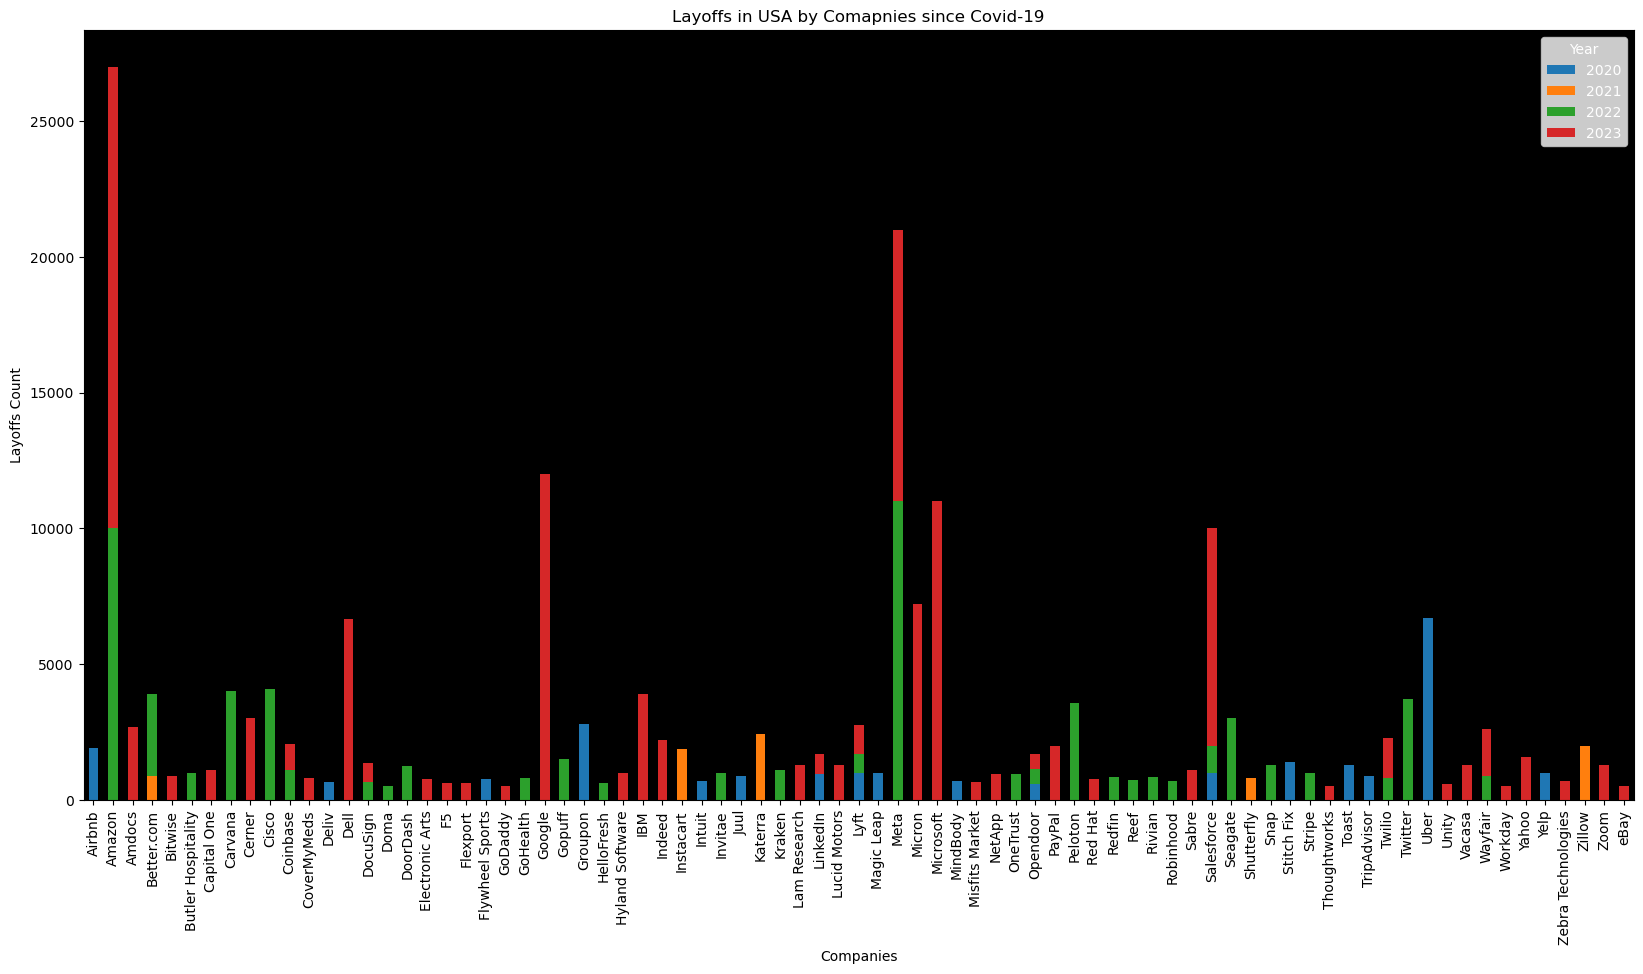

In [61]:
# Data filter for plotting the Stacked bar chart across different companies in USA for the years post Covid-19
USA_df = layoffs_sanitized_dataset[layoffs_sanitized_dataset['country'] == 'United States'].filter(['company','date','total_laid_off'], axis=1)
USA_df['date'] = USA_df['date'].dt.year
USA_df_final = USA_df.sort_values(by=['total_laid_off', 'company'], ascending=False).head(100)

dfp = USA_df_final.pivot_table(index='company', columns='date', values='total_laid_off', aggfunc='sum')
# plot the pivoted dataframe
ax = dfp.plot.bar(stacked=True, figsize=(20, 10), ylabel='Layoffs Count', xlabel='Companies')
ax.set_title('Layoffs in USA by Comapnies since Covid-19', color ='Black')
ax.set_facecolor("black")
plt.legend(title='Year')

# Save the graph in Images folder
plt.savefig("Output_Data/Images/Stacked_BarChart_PostCovid_InUSA_By_Company.png")
plt.show()

### Layoff in Rest of the world for every year since Covid-19, by industry & companies

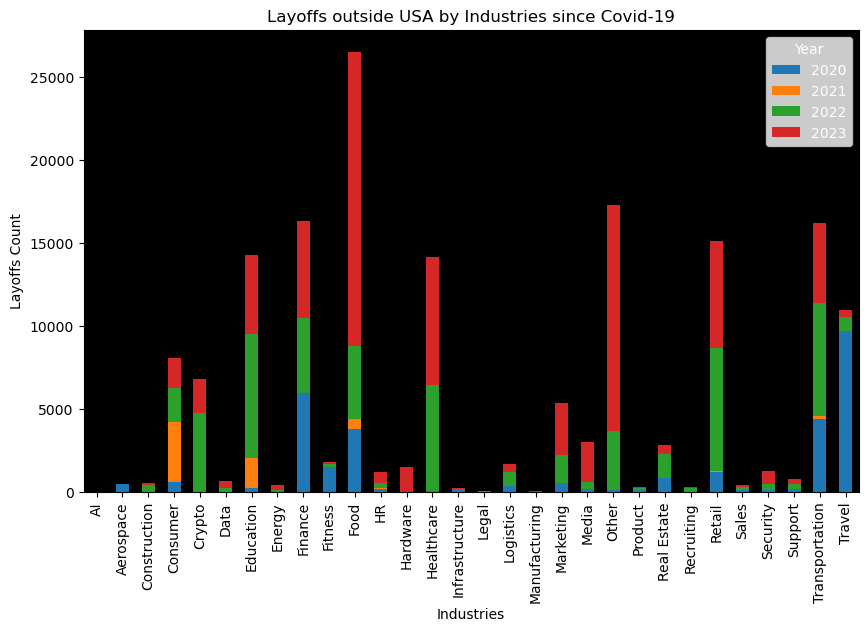

In [62]:
# Data filter for plotting the Stacked bar chart across different industries in rest of the world for the years post Covid-19
ROW_df = layoffs_sanitized_dataset[layoffs_sanitized_dataset['country'] != 'United States'].filter(['industry','date','total_laid_off'], axis=1)
ROW_df['date'] = ROW_df['date'].dt.year

dfp = ROW_df.pivot_table(index='industry', columns='date', values='total_laid_off', aggfunc='sum')
# plot the pivoted dataframe
ax = dfp.plot.bar(stacked=True, figsize=(10, 6), ylabel='Layoffs Count', xlabel='Industries')
ax.set_title('Layoffs outside USA by Industries since Covid-19', color = 'Black')
ax.set_facecolor("black")
plt.legend(title='Year')

# Save the graph in Images folder
plt.savefig("Output_Data/Images/Stacked_BarChart_PostCovid_ROW_By_Industry.png")
plt.show()


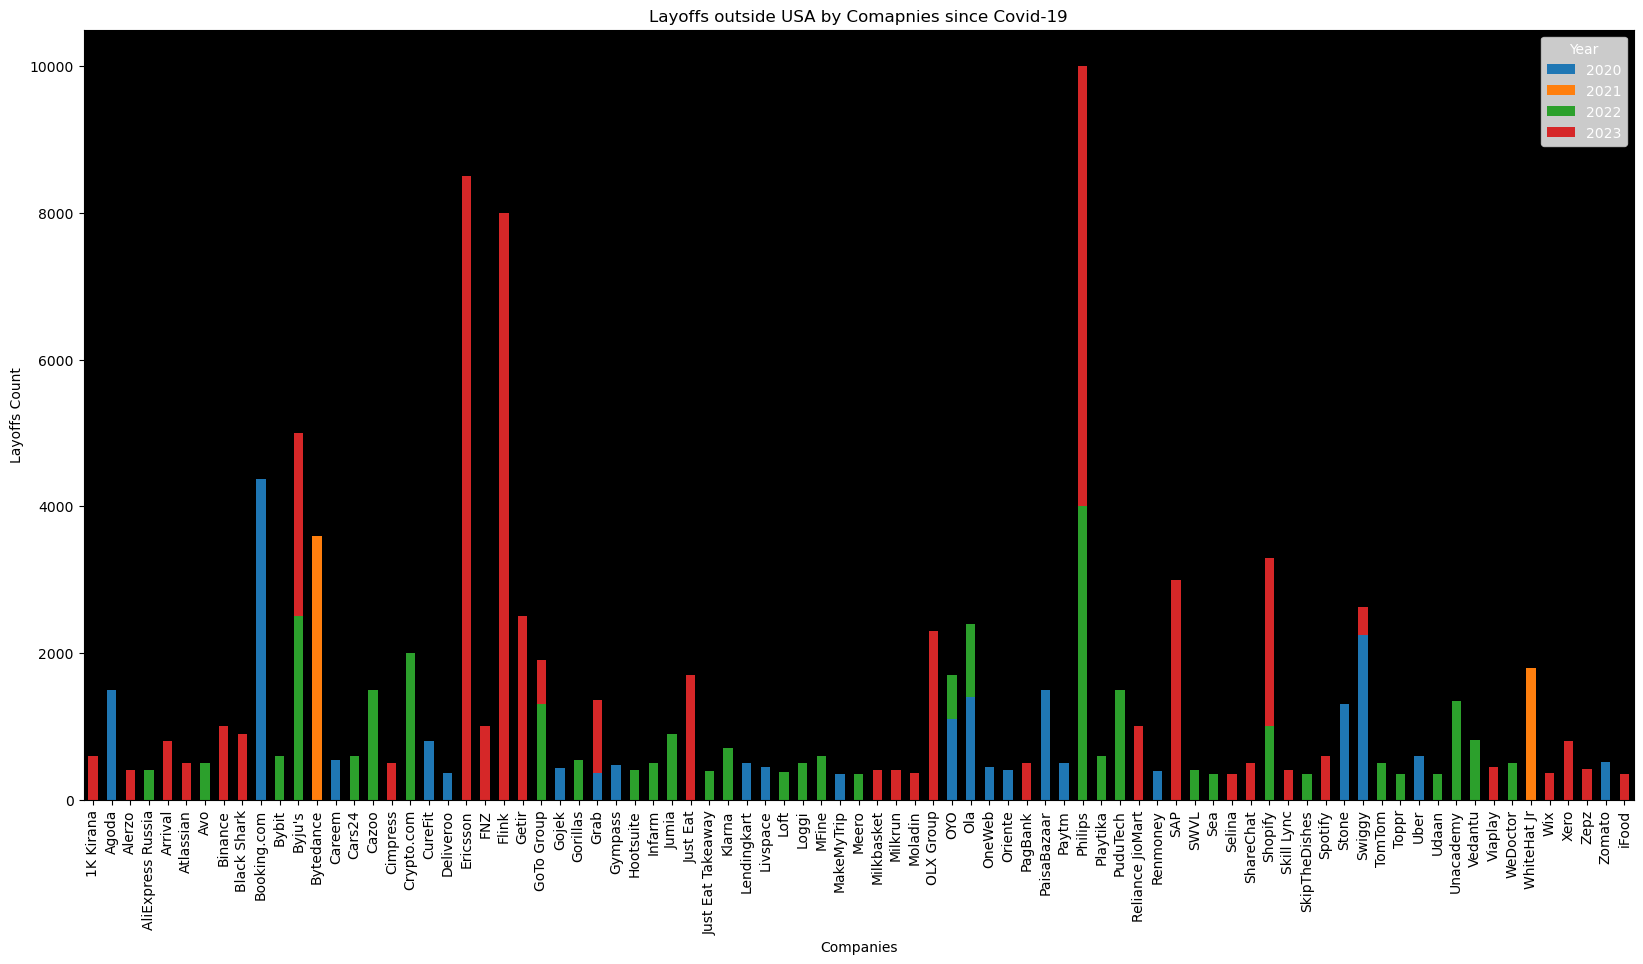

In [44]:
# Data filter for plotting the Stacked bar chart across different companies in ROW for the years post Covid-19

ROW_df = layoffs_sanitized_dataset[layoffs_sanitized_dataset['country'] != 'United States'].filter(['company','date','total_laid_off'], axis=1)
ROW_df['date'] = ROW_df['date'].dt.year
ROW_df_final = ROW_df.sort_values(by=['total_laid_off', 'company'], ascending=False).head(100)

dfp = ROW_df_final.pivot_table(index='company', columns='date', values='total_laid_off', aggfunc='sum')

# plot the pivoted dataframe
ax = dfp.plot.bar(stacked=True, figsize=(20, 10), ylabel='Layoffs Count', xlabel='Companies')
ax.set_title('Layoffs outside USA by Comapnies since Covid-19',color ='Black')
ax.set_facecolor("black")
plt.legend(title='Year')


# Save the graph in Images folder
plt.savefig("Output_Data/Images/Stacked_BarChart_PostCovid_ROW_By_Company.png")
plt.show()

### Top 5 US Industries Statistics

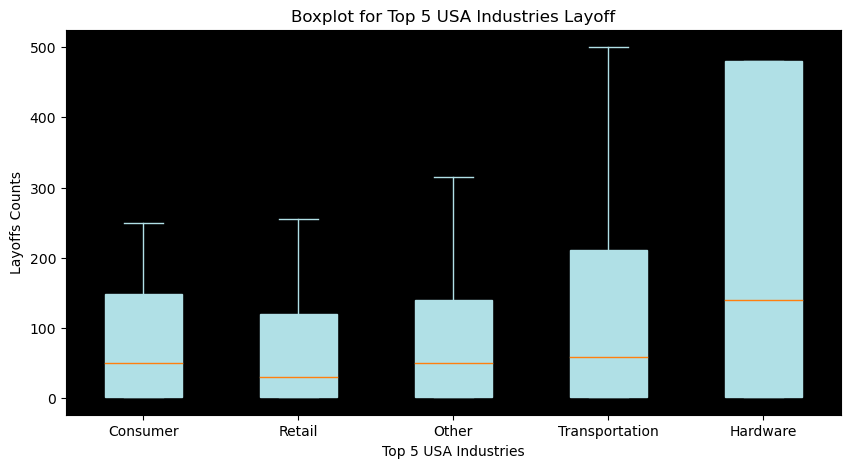

In [55]:
# Get the list of top 5 impacted industries in the USA for x-axis labeling
USindustries_list = layoffs_sanitized_dataset[layoffs_sanitized_dataset['country'] == 'United States'].groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().keys()

# Prepare five series with layoff counts corresponding to each industries identified above
series1 = layoffs_sanitized_dataset.loc[(layoffs_sanitized_dataset['country'] == 'United States') & (layoffs_sanitized_dataset['industry'] == USindustries_list[0])]['total_laid_off']
series2 = layoffs_sanitized_dataset.loc[(layoffs_sanitized_dataset['country'] == 'United States') & (layoffs_sanitized_dataset['industry'] == USindustries_list[1])]['total_laid_off']
series3 = layoffs_sanitized_dataset.loc[(layoffs_sanitized_dataset['country'] == 'United States') & (layoffs_sanitized_dataset['industry'] == USindustries_list[2])]['total_laid_off']
series4 = layoffs_sanitized_dataset.loc[(layoffs_sanitized_dataset['country'] == 'United States') & (layoffs_sanitized_dataset['industry'] == USindustries_list[3])]['total_laid_off']
series5 = layoffs_sanitized_dataset.loc[(layoffs_sanitized_dataset['country'] == 'United States') & (layoffs_sanitized_dataset['industry'] == USindustries_list[4])]['total_laid_off']

data = [series1, series2, series3, series4, series5]

fig, ax = plt.subplots(figsize = (10, 5))
 
# Creating plot
color = 'powderblue'
bp = ax.boxplot(data, showfliers=False, patch_artist=True)
for item in ['boxes', 'whiskers', 'fliers', 'caps']:
        plt.setp(bp[item], color=color)
plt.setp(bp["boxes"], facecolor=color)
plt.setp(bp["fliers"], markeredgecolor=color)
ax.set_facecolor("black")

plt.xticks([1,2,3,4,5],USindustries_list)
plt.xlabel("Top 5 USA Industries")
plt.ylabel("Layoffs Counts")
ax.set_title('Boxplot for Top 5 USA Industries Layoff', color ='Black')

# Save the boxplot in Images folder
plt.savefig("Output_Data/Images/Boxplot for top 5 USA industries.png")
 
# show plot
plt.show()

### Data Analysis from all the graphs and visualizations above
- Based on the dataset we have analyzed for this project, it is quite eveident that USA is the most impacted country throughout the world in terms of layoffs since Covid-19
- Consumer industry segment being the most significantly hit in USA.
- The top 5 USA companies hit by layoffs pie chart clearly confirms this with the names of companies that have made it to the top 5 list.
- In rest of the world, India is the close second after USA in terms of layoffs count. This is quite evident it being a budding technology hub.
- Based on the line graphs analysis over the last 4 years since Covid-19 we can see a trend that layoffs shot up in 2020 when Covid hit then stabilized and later as we came out of pandemic companies again started the layoffs. This could be due to the overhiring that happened before and during pandemic.
- From Box and Whisker plot, it can be inferred that majority of the companies that fall in Consumer & Retail industries on an average laid off approximately equal number of workforce. While companies in Hardware industry had unequal numbers of the laid off workforce. This can be seen from the variance between first and third quartile for the Hardware industry.

### GeoViews - Worldwide cities impacted since Covid-19

In [63]:
# Getting the data filtered to use for plotting the geoview
WW_df = layoffs_sanitized_dataset[layoffs_sanitized_dataset['country'] != 'ABC'].filter(['location','Lat', 'Lon', 'country', 'total_laid_off'], axis=1)
WW_df_temp = pd.DataFrame(WW_df.groupby(['location','country'])['total_laid_off'].sum().sort_values(ascending=False))
WW_df_final = pd.merge(WW_df_temp, WW_df, on='location', how='left').drop_duplicates(subset=['location'], keep='first').head(140)

# Configure the map plot
WW_cities_details_map = WW_df_final.hvplot.points("Lon", "Lat",  color = "location",
                                            alpha = 0.5, tiles=True,
                                             frame_width = 700, frame_height = 500,
                                             hover_cols = ["location", "country"]
                                          )


# Save the graph in Images folder
plt.savefig("Output_Data/Images/GeoView_Cities.png")

# Display the map
WW_cities_details_map

C:\Users\nidhi\anaconda3\envs\dev\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (location,country)

<Figure size 640x480 with 0 Axes>

In [64]:
# Prepare a strip down dataframe to be merged with world map
WW_df = layoffs_sanitized_dataset[layoffs_sanitized_dataset['country'] != 'ABC'].filter(['location','Lat', 'Lon', 'country', 'total_laid_off'], axis=1)
WW_df.loc[WW_df["country"] == "United States", "country"] = "United States of America"

WW_df_final = pd.DataFrame(WW_df.groupby(['country'])['total_laid_off'].sum().sort_values(ascending=False))


In [65]:
# Load the world map shapefile
world_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

WW_layoff_map = pd.merge(world_map, WW_df_final,  left_on= "name", right_on="country")

WW_layoff_map.hvplot.polygons(geo=True, c='total_laid_off', clabel='ABC', hover_cols='all', tiles=True, frame_width = 700, frame_height = 500)


:Overlay
   .Tiles.I    :Tiles   [x,y]
   .Polygons.I :Polygons   [Longitude,Latitude]   (total_laid_off,index,pop_est,continent,name,iso_a3,gdp_md_est)

### Geoviews Analysis
- The first geo map highlights the cities impacted throughout the world by layoffs since Covid-19.
- The second geo map shows the layoffs across the different countries based on the layoffs count. The color scale varies from dark to light shades based on the total layoffs count.

## Final Analysis

- Impact of Covid-19 has been across the world 
- Top industries impacted were Consumer, Retail, Transportation
- Surprisingly, Public companies are impacted more than privately funded companies. This could be because of the external pressure of shareholders on public companies which led to operational cost reduction
- Though companies like Google, Meta are Tech companies they are categorized as consumer industry in this dataset because of their product offerings are consumer focused.
- With start of Covid-19, there were specific industries like Transportation, Hospitality, Retail that got impacted immediately. However, with rise in digital work environment Tech companies over-hired during pandemic to support this growth. Post-pandemic (late 2022 and 2023), these companies and industries did most layoffs to balance for over hiring during pandemic.
